# Eploratory data analysis for Wholescale-Customer data
This EDA will be served to  2 types of machine learning problem, which are called Clusterting and Classification
The Wholescale-Customer Dataset will be used on this task.
<br>
In here, we will do some statistical analysis to dig into this dataset and learn more about how to manipulate the relationships between features.

## Make some observations about Wholescale-Customer Dataset

In [1]:
# Import necessary libarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tqdm
import os
%matplotlib inline

In [2]:
# Set path_file parameters
PATH_FILE = './Wholesale_customers_data.csv'

In [3]:
train_df = pd.read_csv(PATH_FILE)
train_df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


__Let's do some statistical operations on features__
<br>
<br>
__Before we do this, we need to know about <font color=red>Attribute Information:</font>__
<br>
<font color=blue>
1)	FRESH: annual spending (m.u.) on fresh products (Continuous); 
<br>
2)	MILK: annual spending (m.u.) on milk products (Continuous);
<br>
3)	GROCERY: annual spending (m.u.)on grocery products (Continuous); 
<br>
4)	FROZEN: annual spending (m.u.)on frozen products (Continuous) 
    <br>
5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
    <br>
6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
    <br>
7)	CHANNEL: customers Channel - Horeca (Hotel/Restaurant/CafÃ) or Retail channel (Nominal) 
    <br>
8)	REGION: customers Region “ Lisnon, Oporto or Other (Nominal)</font>
<br>
<br>
__The first thing that come to my mind is pandas.describe()__

In [4]:
train_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# Count the number of NaN values
train_df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

So this dataset has no NaN value in all columns

__Count number of different values in <font color=red>Channel</font> column__

In [6]:
train_df.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

__Do the same thing with <font color=red>Region</font> column__

In [7]:
train_df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

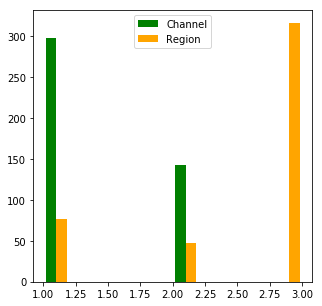

In [8]:
# Draw histogram of this two features
plt.figure(figsize=(5,5))
legend = ['Channel', 'Region']
plt.hist([train_df.Channel, train_df.Region], color=['green', 'orange'])
plt.legend(legend)
plt.show()

__An important note we can conclute here : <font color=red>Channel</font> and <font color=red>Region</font> will be used as two targets (two labels) of our problem.__
<br>
__So we can ignore this two columns and focus on the rest of 6 columns__

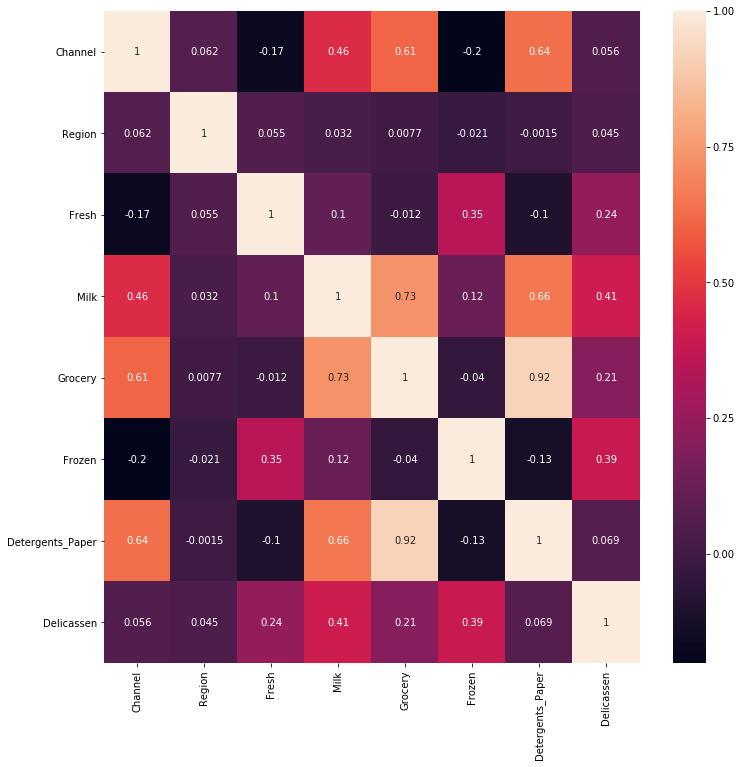

In [9]:
# Heatmap to show coefficient between all features
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(train_df.corr(), annot=True)
plt.show(heatmap)

__Look at the heatmap, we can see that some pair of features have high coeficient but they aren't high enough to ignore one of those. Should we create a multiple lines chart to show the trending of 6 features__

In [10]:
print(train_df.columns)
x_axes = [i for i in range(len(train_df))]

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


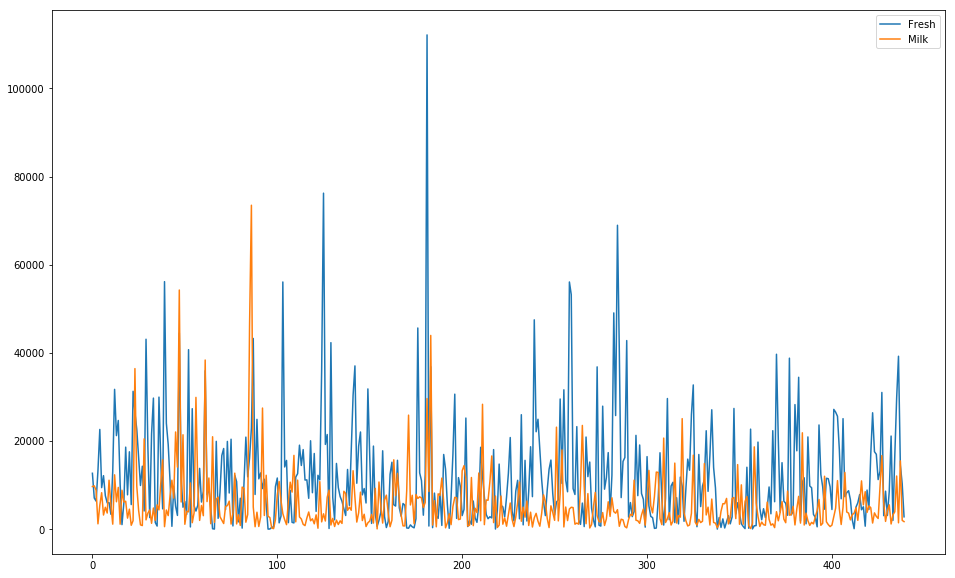

In [11]:
plt.figure(figsize=(16,10))
plt.plot(x_axes, train_df.Fresh)
plt.plot(x_axes, train_df.Milk)
plt.legend(['Fresh', 'Milk'])
plt.show()

__Just not clarify how this two features interact each other, so we will try with bar plot__

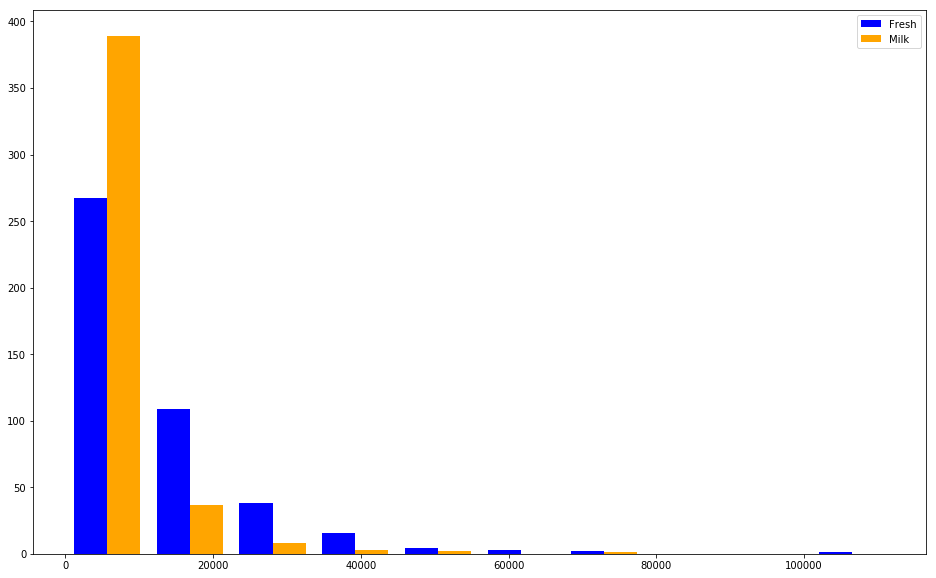

In [12]:
plt.figure(figsize=(16,10))
plt.hist([train_df.Fresh, train_df.Milk], color=['blue', 'orange'])
plt.legend(['Fresh', 'Milk'])
plt.show()

__So, we can see that if <font color=red>fresh</font> has a high value, <font color=red>milk</font> also has a high value, and vice versace__

__Do the same things with other features__

In [14]:
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

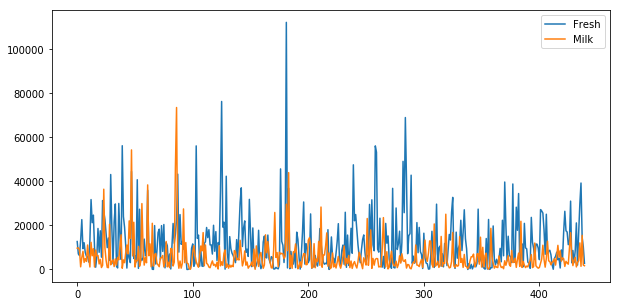

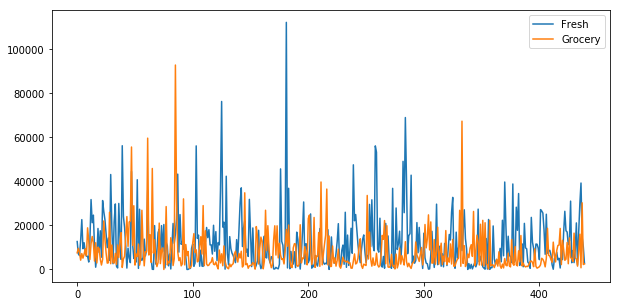

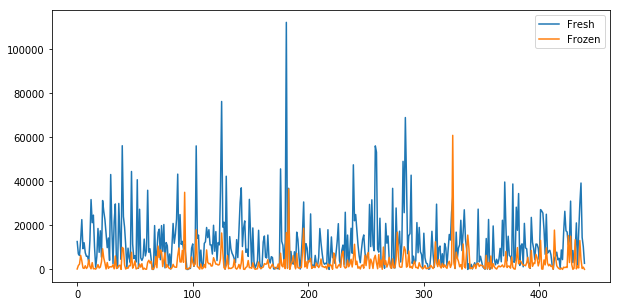

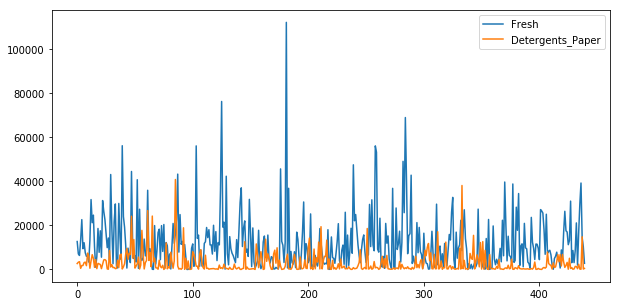

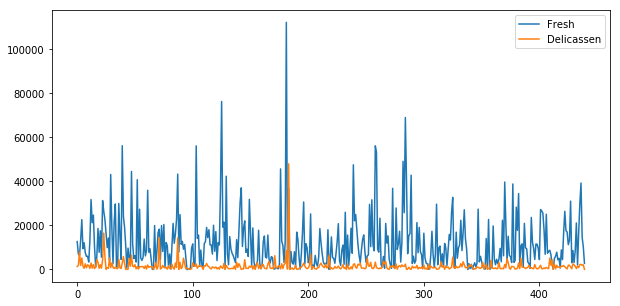

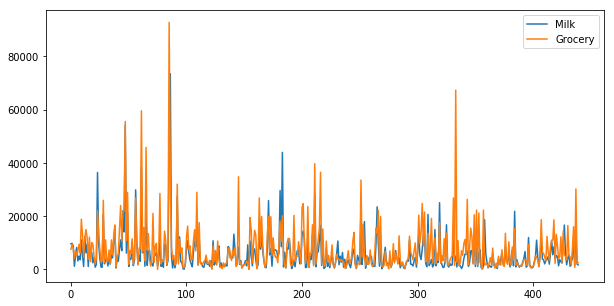

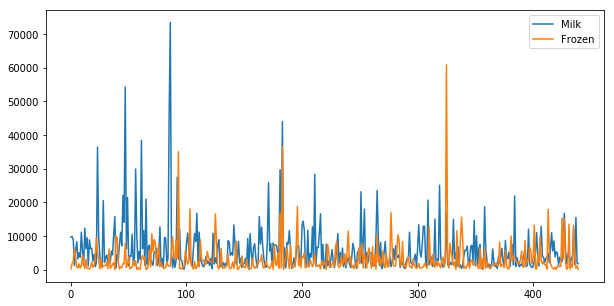

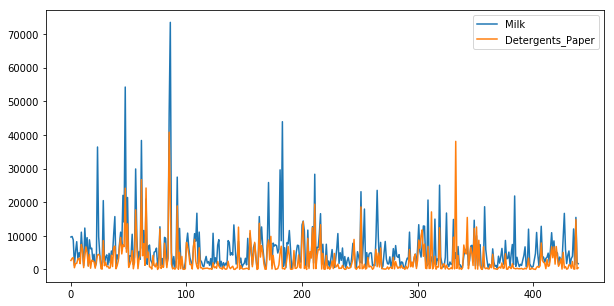

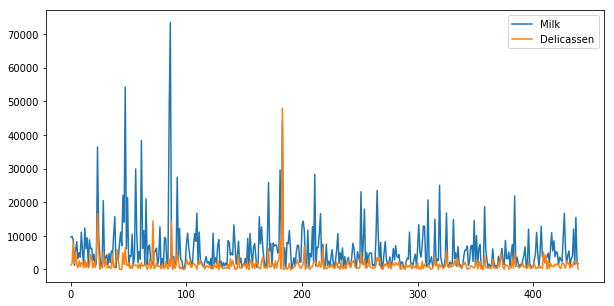

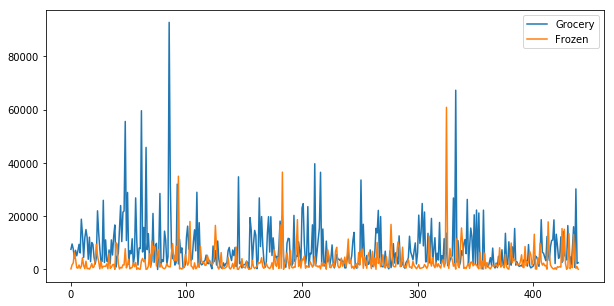

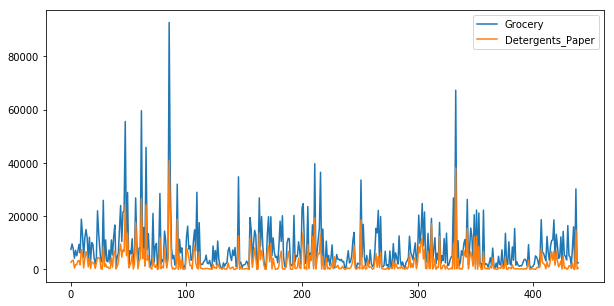

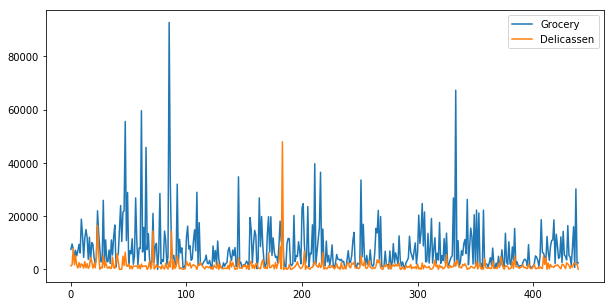

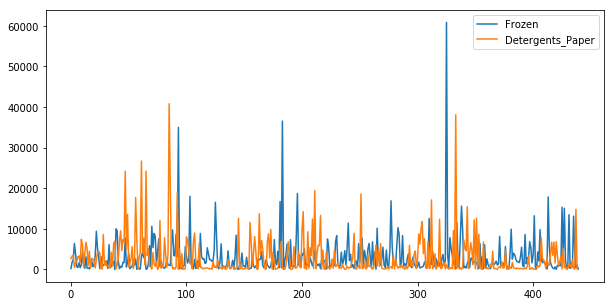

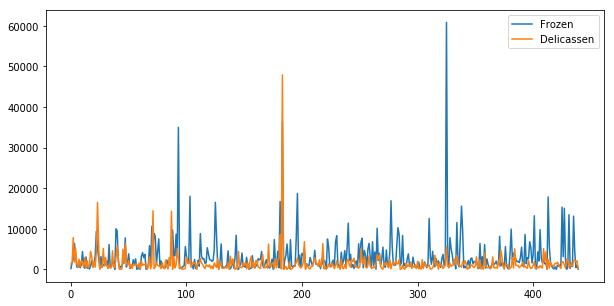

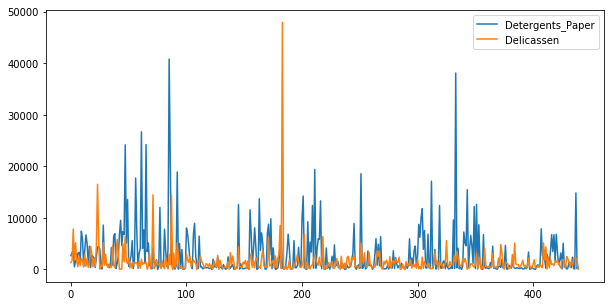

In [16]:
k = 1
for i in range(len(features)-1):
    for j in range(i+1, len(features)):
            plt.figure(figsize=(10, 5))
            fig = plt.figure(k)
            plt.plot(x_axes, train_df[features[i]])
            plt.plot(x_axes, train_df[features[j]])
            plt.legend([features[i], features[j]])
            k += 1

__Flexibly plot a univariate distribution of observations__

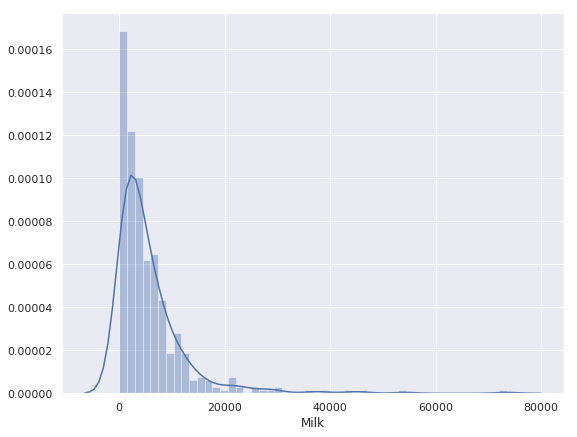

In [25]:
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(train_df.Milk)

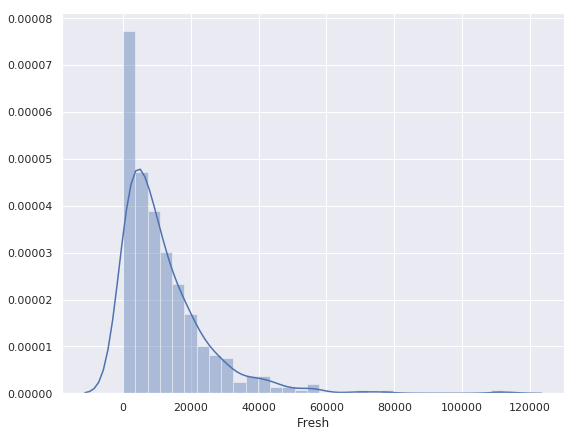

In [26]:
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(train_df.Fresh)

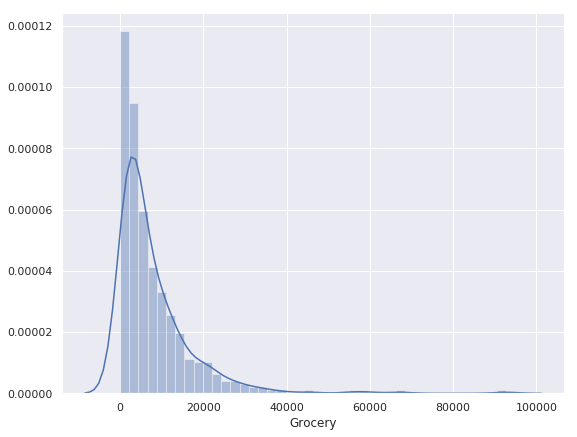

In [27]:
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(train_df.Grocery)

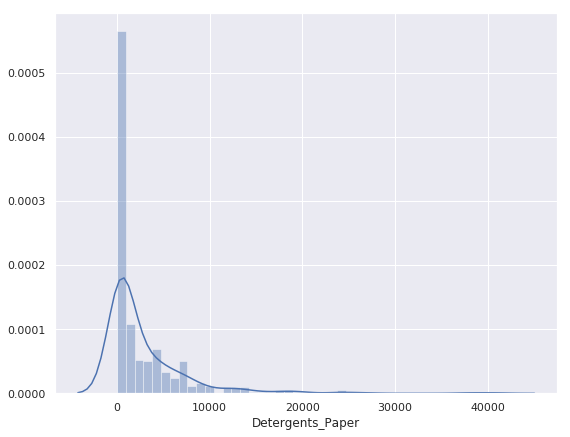

In [22]:
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(train_df.Detergents_Paper)

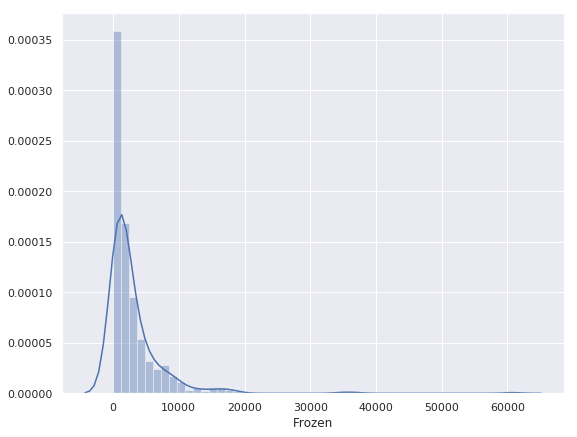

In [23]:
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(train_df.Frozen)

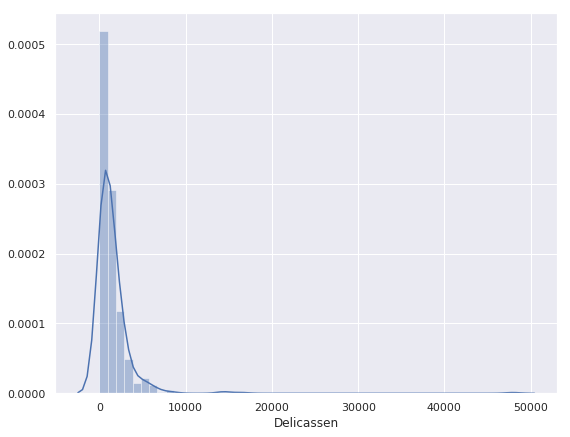

In [24]:
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(train_df.Delicassen)

__All histograms__

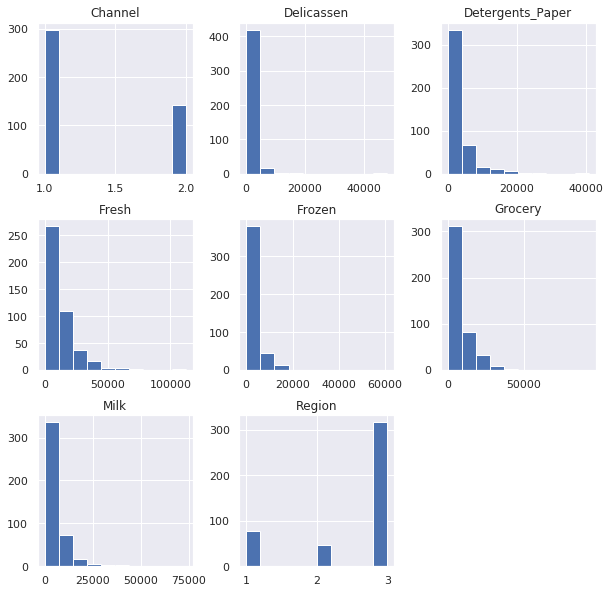

In [34]:
train_df.hist(figsize=(10, 10))
plt.figure()

__Multivariate Plot__

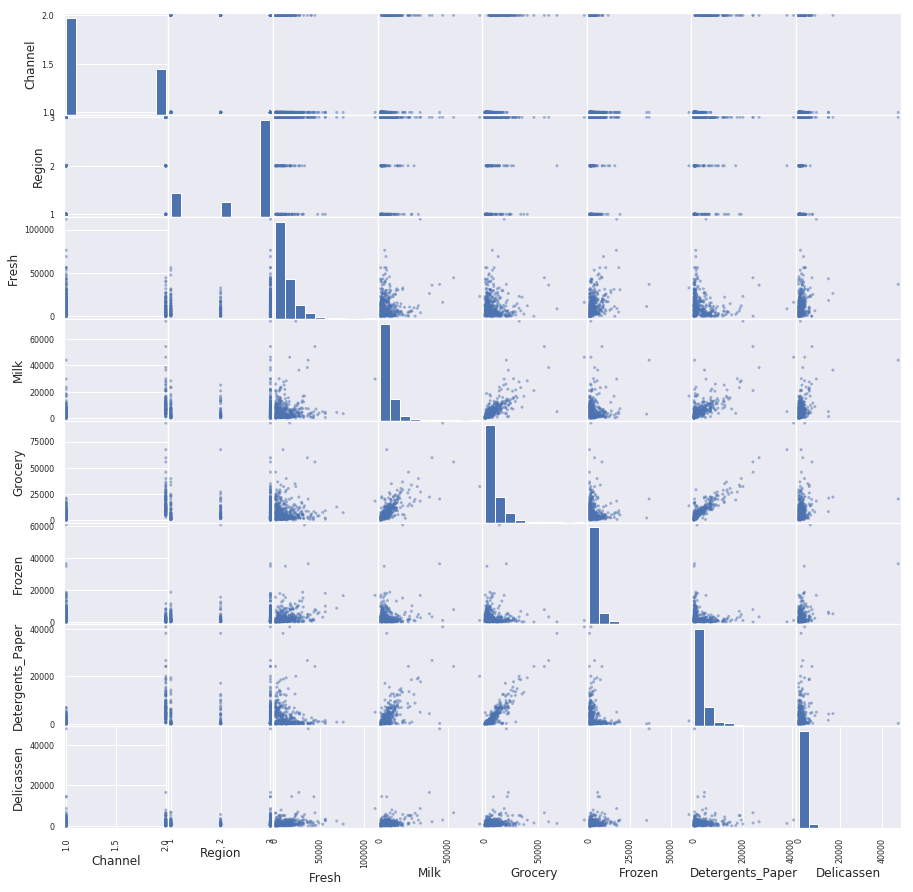

In [36]:
pd.plotting.scatter_matrix(train_df[columns], figsize=(15, 15))
plt.figure()